In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

# Load cleaned dataset
df = pd.read_csv('/Users/sa3/Desktop/Financial Fraud Detection/Data/Clean Data.csv')

# Sample only 30% for initial training & hyperparameter tuning
sample_df = df.sample(frac=0.3, random_state=42) 

# Prepare features and target
X = sample_df.drop(columns=['isFraud'])
y = sample_df['isFraud']

# Convert categorical variables
X = pd.get_dummies(X, columns=['type'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define function to train, evaluate, and print results
def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return acc, f1



Training models with default parameters...


Logistic Regression Performance:
Accuracy: 0.9982
F1 Score: 0.6057
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165726
           1       0.87      0.46      0.61       499

    accuracy                           1.00    166225
   macro avg       0.93      0.73      0.80    166225
weighted avg       1.00      1.00      1.00    166225



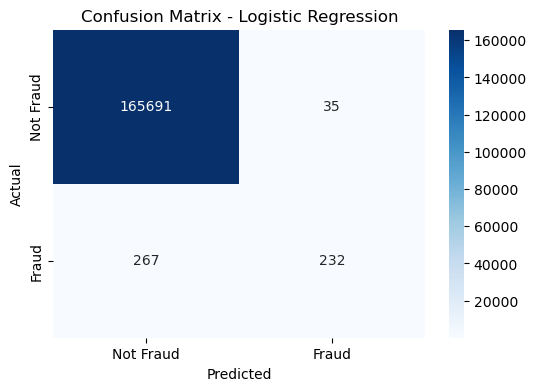


Naive Bayes Performance:
Accuracy: 0.9900
F1 Score: 0.1799
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    165726
           1       0.12      0.37      0.18       499

    accuracy                           0.99    166225
   macro avg       0.56      0.68      0.59    166225
weighted avg       1.00      0.99      0.99    166225



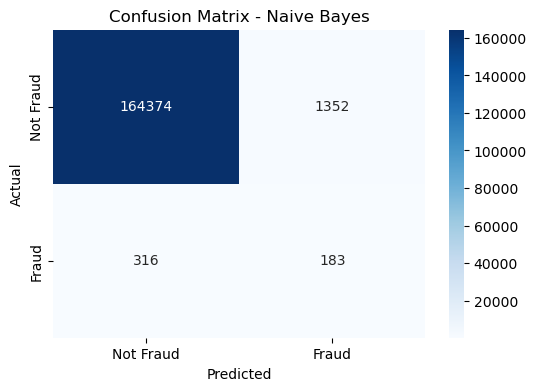


kNN Classifier Performance:
Accuracy: 0.9985
F1 Score: 0.7104
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165726
           1       0.88      0.60      0.71       499

    accuracy                           1.00    166225
   macro avg       0.94      0.80      0.85    166225
weighted avg       1.00      1.00      1.00    166225



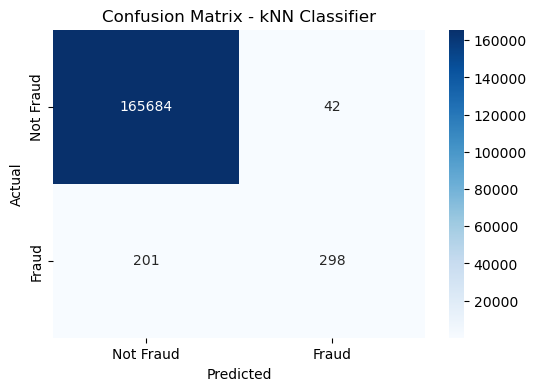


SVM Classifier Performance:
Accuracy: 0.9984
F1 Score: 0.6405
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165726
           1       0.98      0.47      0.64       499

    accuracy                           1.00    166225
   macro avg       0.99      0.74      0.82    166225
weighted avg       1.00      1.00      1.00    166225



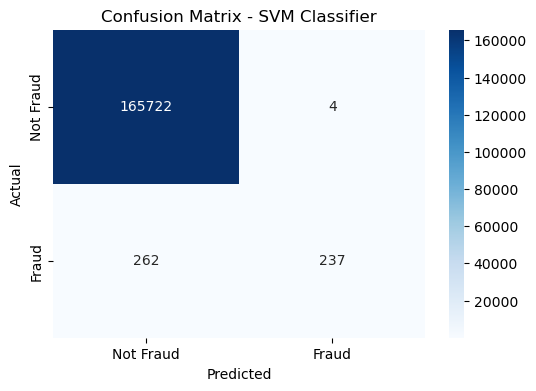


Random Forest Performance:
Accuracy: 0.9994
F1 Score: 0.8840
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165726
           1       0.99      0.80      0.88       499

    accuracy                           1.00    166225
   macro avg       0.99      0.90      0.94    166225
weighted avg       1.00      1.00      1.00    166225



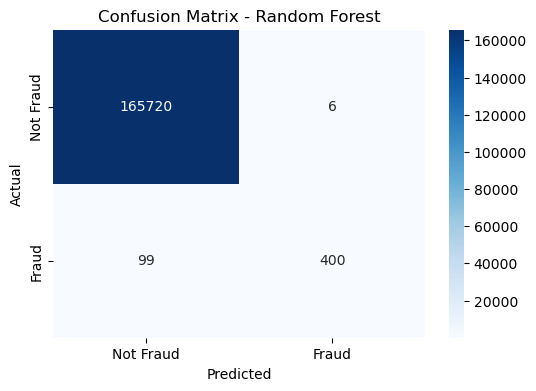


Gradient Boosting Performance:
Accuracy: 0.9990
F1 Score: 0.8136
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    165726
           1       0.94      0.72      0.81       499

    accuracy                           1.00    166225
   macro avg       0.97      0.86      0.91    166225
weighted avg       1.00      1.00      1.00    166225



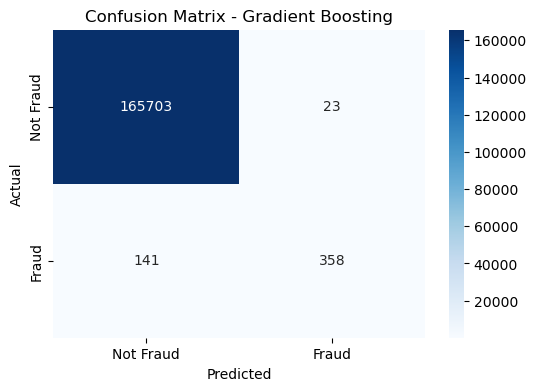


Best performing model: Random Forest


In [7]:
# Dictionary to store results
model_results = {}

# Train models with default parameters to find the best one
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "kNN Classifier": KNeighborsClassifier(),
    "SVM Classifier": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

print("\nTraining models with default parameters...\n")
for name, model in models.items():
    acc, f1 = train_evaluate_model(model, name)
    model_results[name] = {'Accuracy': acc, 'F1 Score': f1}

    # Find best model based on F1 Score
best_model_name = max(model_results, key=lambda k: model_results[k]['F1 Score'])
print(f"\nBest performing model: {best_model_name}")

# Define hyperparameter tuning for best model
param_grids = {
    "Logistic Regression": {'C': uniform(0.1, 10), 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200]},
    "Naive Bayes": {'var_smoothing': np.logspace(0,-9, num=100)},
    "kNN Classifier": {'n_neighbors': randint(3, 20), 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    "SVM Classifier": {'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    "Random Forest": {'n_estimators': randint(50, 200), 'max_depth': randint(3, 20), 
                      'min_samples_split': randint(2, 10), 'min_samples_leaf': randint(1, 10), 'bootstrap': [True, False]},
    "Gradient Boosting": {'n_estimators': randint(50, 200), 'learning_rate': uniform(0.01, 0.2),
                          'max_depth': randint(3, 20), 'min_samples_split': randint(2, 10), 'min_samples_leaf': randint(1, 10)}
}

### Key Takeaways:

- Random Forest achieved the highest F1-score (0.8840), making it the best overall model.
- Gradient Boosting performed almost as well (0.8136) and is useful for refining fraud detection.
- Logistic Regression and SVM struggle due to class imbalance, despite high accuracy.
- Naive Bayes performed the worst due to its assumption of feature independence.
- kNN works well but is computationally expensive for large datasets.


Random Forest is the best model for fraud detection due to its balance of high accuracy and F1-score.


Starting hyperparameter tuning for Random Forest...

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=6, min_samples_split=6, n_estimators=51; total time=  34.4s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=6, min_samples_split=6, n_estimators=51; total time=  34.5s
[CV] END bootstrap=False, max_depth=5, min_samples_leaf=6, min_samples_split=6, n_estimators=51; total time=  36.6s
[CV] END bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time= 1.4min
[CV] END bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time= 1.4min
[CV] END bootstrap=True, max_depth=17, min_samples_leaf=8, min_samples_split=6, n_estimators=70; total time= 1.5min
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=6, min_samples_split=3, n_estimators=70; total time= 1.8min
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=8, min_samples_s

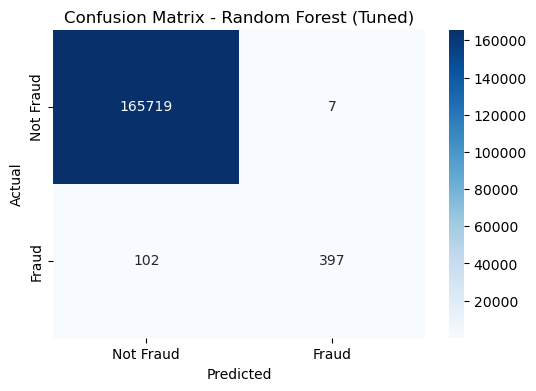


Final Model Results:
Accuracy: 0.9993
F1 Score: 0.8793


In [6]:
# Run hyperparameter tuning only for best model
best_model = models[best_model_name]
param_grid = param_grids[best_model_name]

print(f"\nStarting hyperparameter tuning for {best_model_name}...\n")
random_search = RandomizedSearchCV(estimator=best_model, param_distributions=param_grid,
                                   n_iter=30, scoring='f1', cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Print best hyperparameters found
print(f"\nBest Hyperparameters for {best_model_name}: {random_search.best_params_}\n")

# Retrain with best hyperparameters on full dataset
df_full = pd.get_dummies(df.drop(columns=['isFraud']), columns=['type'])  # Full dataset
y_full = df['isFraud']
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(df_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

# Scale full dataset
X_full_train = scaler.fit_transform(X_full_train)
X_full_test = scaler.transform(X_full_test)

# Final training on full dataset
final_model = random_search.best_estimator_
final_model.fit(X_full_train, y_full_train)

# Evaluate final model
final_acc, final_f1 = train_evaluate_model(final_model, f"{best_model_name} (Tuned)")

print("\nFinal Model Results:")
print(f"Accuracy: {final_acc:.4f}")
print(f"F1 Score: {final_f1:.4f}")
